In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
# To evaluate the model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score 
# To graph the results
import matplotlib.pyplot as plt
import time
import random

In [3]:
# Neural Network as a class
class NN:
    
    # Constructor method
    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.estimator = None 
        self.__score_mse = None
        self.__score_mae = None
        self.__figure_name = None
        self.__y_pred = None
        self.__r2 = None
    
    # Destructor
    def __del__(self):
        print("The Keras Regressor Neural Network has been deleted")
        
    # Create Model
    def create_model(self,opt, loss, fun, init,epo, batch,nn):
        self.opt = opt
        self.loss = loss
        self.fun = fun
        self.init = init
        self.epo = epo
        self.batch = batch
        self.nn = nn

        
        # when X_train (input) is 1 a direct assingment is needed, otherwise there is a problem here inputs= X_train.shape[1]
        if len(self.X_train.shape) == 1:
            inputs= 1
        else: 
            inputs= self.X_train.shape[1]
    
        # Define the keras base model 
        def baseline_model():
            kerasmodel = Sequential()
            kerasmodel.add(Dense(nn[0], input_dim=inputs, kernel_initializer=init, activation=fun))
            kerasmodel.add(Dense(nn[1], kernel_initializer=init, activation=fun))
            kerasmodel.add(Dense(1,kernel_initializer=init))  
            
            # Compile model 
            kerasmodel.compile(loss=loss, optimizer= opt)
            return kerasmodel

        self.estimator = KerasRegressor(build_fn=baseline_model, epochs=epo, batch_size=batch, verbose=0)
        self.estimator.fit(self.X_train,self.y_train)
        
        # Quality of the NN    
        self.__y_pred = self.estimator.predict(self.X_test)
        self.__score_mse = mean_squared_error(self.y_test, self.__y_pred)
        self.__score_mae = mean_absolute_error(self.y_test, self.__y_pred)
        self.__r2 = r2_score(self.y_test, self.__y_pred) 
        plt.plot(self.y_test.values, label="y original")
        plt.plot(self.__y_pred, label="y predicted")
        plt.legend()      
        self.__figure_name = 'figure_NN_{}_{}.png'.format(random.randint(100, 999), time.time() * 1000)
        plt.savefig('/Users/HP14/Documents/THKoln/OOP/Git/oopproject/group_1/oop_desktop/plots/{}'.format(self.__figure_name))
        plt.show()
        plt.close()
    
    def get_score_mse(self):
        return self.__score_mse

    def get_score_mae(self):
        return self.__score_mae
    
    def get_score_r2(self):
        return self.__r2
    
    def get_figure_name(self):
        return self.__figure_name

    def predict(self):
        return self.__y_pred

In [8]:
df=pd.read_excel('/Users/HP14/Documents/THKoln/OOP/Project/Testing/Real estate valuation data set.xlsx')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


The Keras Regressor Neural Network has been deleted


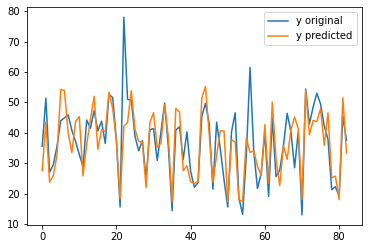

59.630770140380605
5.413187826685158
0.5756684143982369
figure_NN_493_1612533338704.5535.png
[27.63731  43.498882 23.74888  25.976286 32.659023 54.261295 53.88831
 39.932663 33.554977 43.765697 45.313946 25.800896 36.313328 44.30112
 51.982533 34.57809  41.009647 40.453087 53.400406 47.955322 37.332233
 18.287598 42.115685 43.379364 53.83496  41.188923 37.22938  36.73812
 21.9607   43.254932 46.606014 35.16208  36.5264   49.26675  38.466595
 17.22733  47.980846 46.84505  27.53688  29.173042 23.94568  23.373848
 23.97145  51.376064 55.252663 39.37289  23.746166 32.56631  40.669178
 40.594257 17.210236 37.692303 37.043453 18.072535 17.398748 38.262638
 33.55038  34.13486  28.980762 26.014215 42.678993 23.374832 50.111797
 31.534138 22.631058 35.812557 31.289371 40.771976 45.191746 41.368202
 18.070505 53.998165 39.36928  44.079742 43.678165 47.938564 35.83648
 46.565083 25.226254 25.760391 18.070505 51.513805 33.363083]


In [5]:
seed = 7
np.random.seed(seed)

df=pd.read_excel('/Users/HP14/Documents/THKoln/OOP/Project/Testing/Real estate valuation data set.xlsx')

# Inputs and Outputs 
X=df.drop(columns=['Y house price of unit area', 'No','X1 transaction date',]) # inputs
#X=df[['X3 distance to the nearest MRT station', 'X2 house age']]
#X=df[ 'X4 number of convenience stores']          # inputs
y=df['Y house price of unit area']                # outputs
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=5)
  
# fun = ['sigmoid' , 'relu', **'softmax', 'softplus', 'softsign', 'tanh', 'selu', 'elu', 'exponential')
# init = ['uniform', 'lecun_uniform', 'normal', **'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
# loss = ['MAE', 'MSE', 'MAPE']
# opt = ['Adadelta', 'Adagrad', 'Adam', 'Adamax', 'Nadam', 'RMSprop', 'SGD']

opt='adam'              # optimizer to compile the model
loss = 'mse'            # objective function (losses)
fun='relu'              # activation function
init='normal'       # initializacion function
epo=500                 # epochs (one forward pass and one backward pass of all the training examples) the >> the best
# from 1 to n of samples
batch = 5              # batch_size (the number of training examples in one forward/backward pass) the << the best (until 1)
nn = [12,8]             # number of neurons in layer 1 and 2
nn1 = NN(X_train, X_test, y_train, y_test) # creation of the object
nn1.create_model(opt, loss, fun,init,epo, batch, nn) # creation of the model
mse=nn1.get_score_mse()
print(mse)
mae=nn1.get_score_mae()
print(mae)
r2=nn1.get_score_r2()
print(r2)
fig=nn1.get_figure_name()
print(fig)
pred=nn1.predict()
print(pred)